In [11]:
# import geotaste
import sys; sys.path.insert(0,'..')
from geotaste import *

## app
from dash import Dash, html, dcc, callback, Output, Input
import plotly.express as px
import pandas as pd

from jupyter_dash import JupyterDash

import numpy as np
import pandas as pd
import plotly.graph_objects as go

np.random.seed(1)
I_list = list(np.random.randint(0,3229,10))
skiplist = set(range(1, 3229)) - set(I_list)
locations = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_us_cities.csv', skiprows=skiplist)

scale = 5000

token = open(os.path.expanduser("~/.mapbox_token")).read() # you will need your own token


In [2]:
# # Make app
# app = JupyterDash(__name__)

# app.layout = html.Div([
#     html.H1(children='GeoTaste', style={'textAlign':'center'}),
#     dcc.Dropdown(df.country.unique(), 'Canada', id='dropdown-selection'),
#     dcc.Graph(id='graph-content')
# ])

# @callback(
#     Output('graph-content', 'figure'),
#     Input('dropdown-selection', 'value')
# )
# def update_graph(value):
#     dff = df[df.country==value]
#     return px.line(dff, x='year', y='pop')

# # go !
# if __name__=='__main__':app.run_server(mode="inline")

In [3]:
fdf = filter_figdf(get_combined_filtered_events_for())

Finding appropriate dwelling ID for events: 100%|████| 20549/20549 [00:02<00:00, 8282.56it/s]


In [4]:
df = fdf.sample(frac=1)
df = df[df.arrond_id!='']
# df = df[df.event_type=='Borrow']
# df = df[df.book_id=='joyce-ulysses']

In [5]:
figdf = df

def plot_map(df):
    fig = px.scatter_mapbox(
        df,
        lat="lat",
        lon="lon",
        hover_name="event_id",
        hover_data=['event_id','member_id','book_id'],
        # color_discrete_sequence=["fuchsia"],
        zoom=12,
        height=600,
        color='event_type',
        center={'lat':latlon_SCO[0], 'lon':latlon_SCO[1]},
        # animation_frame='start_date'
    )

    # fig.update_geos(fitbounds="locations")
    fig.update_layout(
        # height=600,
        # width=600,
        # margin={"r":0,"t":0,"l":0,"b":0},
        mapbox_style="carto-positron",
        # zoom=10
    )

    return fig

In [13]:
# def add_line(from_latlon, to_latlon):
#     from_lat,from_lon = from_latlon
#     to_lat,to_lon = to_latlon
#     lats = [from_lat, to_lat]
#     lons = [from_lon, to_lon]
    
#     fig.add_trace(
#         go.Scattergeo(
#             lat = lats, 
#             lon = lons,
#             mode = 'lines',
#             line = dict(width = 1, color = 'blue'),
#         ))
    
#     return fig
# #     #Workaround to get the arrow at the end of an edge AB

# #     l = 1.1  # the arrow length
# #     widh =0.035  #2*widh is the width of the arrow base as triangle

# #     A = np.array(from_latlon)
# #     B = np.array(to_latlon)
# #     v = B-A
# #     w = v/np.linalg.norm(v)     
# #     u  =np.array([-v[1], v[0]])  #u orthogonal on  w

# #     P = B-l*w
# #     S = P - widh*u
# #     T = P + widh*u

# #     fig.add_trace(go.Scattergeo(lon = [S[0], T[0], B[0], S[0]], 
# #                                 lat =[S[1], T[1], B[1], S[1]], 
# #                                 mode='lines', 
# #                                 fill='toself', 
# #                                 fillcolor='blue', 
# #                                 line_color='blue'))
#     #------Display your text at the middle of the segment AB
#     # fig.add_trace(go.Scattergeo(lon =[0.5*(A+B)[0]], lat = [0.5*(A+B)[1]], mode='text', text='               Your text'))

    

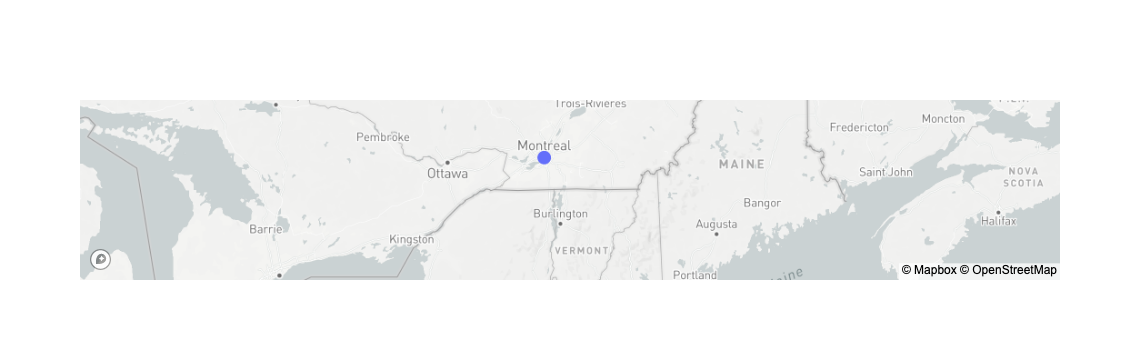

In [12]:

fig = go.Figure(go.Scattermapbox(
        lat=['45.5017'],
        lon=['-73.5673'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=14
        ),
        text=['Montreal'],
    ))

fig.update_layout(
    hovermode='closest',
    mapbox=dict(
        accesstoken=token,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=45,
            lon=-73
        ),
        pitch=0,
        zoom=5
    )
)

fig.show()

In [ ]:
# px.scatter_mapbox??

In [ ]:
fig = plot_map(df)

row=df.sample(n=1).iloc[0]
latlon=(row.lat,row.lon)


fig = add_line(latlon_SCO, latlon)
fig